<a href="https://colab.research.google.com/github/AndresMontesDeOca/Redes_Neuronales/blob/main/Ejercicios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Redes Neuronales - Guia Ejercicios

## Librerias

In [56]:
import pandas as pd
import numpy as np
from matplotlib import pylab as plt
import seaborn as sns
import tensorflow as tf
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# from sklearn import model_selection, preprocessing, metrics

##################################################################

ColabNotebook = 'google.colab' in str(get_ipython())

if ColabNotebook: # maquina virtual colab
    # monta G-drive en entorno COLAB
    from google.colab import drive
    drive.mount('/content/drive/')

    # carpeta donde se encuentran archivos .py auxiliares
    FUENTES_DIR = '/content/drive/MyDrive/Colab Notebooks/Redes_Neuronales/Fuentes/'
    DATOS_DIR = '/content/drive/MyDrive/Colab Notebooks/Redes_Neuronales/Data/'      # carpeta donde se encuentran los datasets
else: # maquina local ipython
    # configuración para notebook con instalación LOCAL
    FUENTES_DIR = '../Fuentes' # carpeta donde se encuentran archivos .py auxiliares
    DATOS_DIR   = '../Datos/'  # carpeta donde se encuentran los datasets

# agrega ruta de busqueda donde tenemos archivos .py
import sys
sys.path.append(FUENTES_DIR)

from ClassPerceptron import Perceptron  # importa clase preceptron de Laura


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


# TP #1

## Ejercicio 3, Semillas

In [84]:
# Cargamos los Datos
data = pd.read_csv(DATOS_DIR + 'Semillas.csv')
print(data.info())
display(data.head())
print(data['Clase'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Area         210 non-null    float64
 1   Perimetro    210 non-null    float64
 2   Compacidad   210 non-null    float64
 3   LongNucleo   210 non-null    float64
 4   AnchoNucleo  210 non-null    float64
 5   Asimetria    210 non-null    float64
 6   LongSurco    210 non-null    float64
 7   Clase        210 non-null    object 
dtypes: float64(7), object(1)
memory usage: 13.2+ KB
None


,Area,Perimetro,Compacidad,LongNucleo,AnchoNucleo,Asimetria,LongSurco,Clase
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,Tipo1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,Tipo1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,Tipo1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,Tipo1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,Tipo1


Clase
Tipo1    70
Tipo2    70
Tipo3    70
Name: count, dtype: int64


In [85]:
# Normalizamos
scaler = StandardScaler()
data_norm = scaler.fit_transform(data.drop('Clase', axis=1))
data_norm = pd.DataFrame(data_norm, columns=data.columns[:-1])
data_norm

,Area,Perimetro,Compacidad,LongNucleo,AnchoNucleo,Asimetria,LongSurco
0,0.142098,0.215462,0.000061,0.304218,0.141702,-0.986152,-0.383577
1,0.011188,0.008224,0.428515,-0.168625,0.197432,-1.788166,-0.922013
2,-0.192067,-0.360201,1.442383,-0.763637,0.208048,-0.667479,-1.189192
3,-0.347091,-0.475333,1.039381,-0.688978,0.319508,-0.960818,-1.229983
4,0.445257,0.330595,1.374509,0.066666,0.805159,-1.563495,-0.475356
...,...,...,...,...,...,...,...
205,-0.915515,-1.043321,0.309736,-1.112048,-0.736716,-0.046135,-1.097413
206,-1.246235,-1.288937,-0.844122,-1.105261,-1.230328,0.416540,-0.826156
207,-0.567571,-0.690247,0.733948,-0.888070,-0.070604,3.076588,-0.718060
208,-1.036090,-1.035645,-0.801701,-1.026077,-1.121521,-0.068135,-0.742535


In [86]:
# Creamos la Variable de Clase para cada Clase
Tipo1 = (data['Clase'] == 'Tipo1').astype(int)
Tipo2 = (data['Clase'] == 'Tipo2').astype(int)
Tipo3 = (data['Clase'] == 'Tipo3').astype(int)

In [87]:
data_norm

,Area,Perimetro,Compacidad,LongNucleo,AnchoNucleo,Asimetria,LongSurco
0,0.142098,0.215462,0.000061,0.304218,0.141702,-0.986152,-0.383577
1,0.011188,0.008224,0.428515,-0.168625,0.197432,-1.788166,-0.922013
2,-0.192067,-0.360201,1.442383,-0.763637,0.208048,-0.667479,-1.189192
3,-0.347091,-0.475333,1.039381,-0.688978,0.319508,-0.960818,-1.229983
4,0.445257,0.330595,1.374509,0.066666,0.805159,-1.563495,-0.475356
...,...,...,...,...,...,...,...
205,-0.915515,-1.043321,0.309736,-1.112048,-0.736716,-0.046135,-1.097413
206,-1.246235,-1.288937,-0.844122,-1.105261,-1.230328,0.416540,-0.826156
207,-0.567571,-0.690247,0.733948,-0.888070,-0.070604,3.076588,-0.718060
208,-1.036090,-1.035645,-0.801701,-1.026077,-1.121521,-0.068135,-0.742535


In [88]:
# Confirmamos si Tipo 1

# Spliteamos
Xtrain, Xtest, ytrain, ytest = train_test_split(data_norm.values, Tipo1.values, test_size=0.2)
# .values extracts numerical data from the DataFrame, avoiding potential string type issues

# Instanciamos el modelo y entrenamos
ppn = Perceptron(alpha=0.05, n_iter=200)
ppn.fit(Xtrain, ytrain)

# Probamos el modelo
ypredict = ppn.predict(Xtest)

aciertos = sum(ypredict == ytest)
print("aciertos = ", aciertos)

nAciertos = sum(ypredict == ytest)
print("%% de aciertos = %.2f %%" % (100*nAciertos/Xtest.shape[0]))


aciertos =  40
% de aciertos = 95.24 %


- Como no da un accuracy del 100%, esta no es la clase que predice a la perfeccion

In [89]:
# Confirmamos si Tipo 2

# Opcional: Eliminamos AREA y PERIMETRO para ver si tambien funciona, pregunta #9 del TP
# data_norm = data_norm.drop(columns=['Area', 'Perimetro'])

# Spliteamos
Xtrain, Xtest, ytrain, ytest = train_test_split(data_norm.values, Tipo2.values, test_size=0.2)
# .values extracts numerical data from the DataFrame, avoiding potential string type issues

# Instanciamos el modelo y entrenamos
ppn = Perceptron(alpha=0.05, n_iter=200)
ppn.fit(Xtrain, ytrain)

# Probamos el modelo
ypredict = ppn.predict(Xtest)

aciertos = sum(ypredict == ytest)
print("aciertos = ", aciertos)

nAciertos = sum(ypredict == ytest)
print("%% de aciertos = %.2f %%" % (100*nAciertos/Xtest.shape[0]))


aciertos =  41
% de aciertos = 97.62 %


- Pareciera ser que la Clase2 es la que clasifica correctamente, ya que su acurracy es del 100%

In [63]:
# Confirmamos si Tipo 3

# Spliteamos
Xtrain, Xtest, ytrain, ytest = train_test_split(data_norm.values, Tipo3.values, test_size=0.2)
# .values extracts numerical data from the DataFrame, avoiding potential string type issues

# Instanciamos el modelo y entrenamos
ppn = Perceptron(alpha=0.05, n_iter=200)
ppn.fit(Xtrain, ytrain)

# Probamos el modelo
ypredict = ppn.predict(Xtest)

aciertos = sum(ypredict == ytest)
print("aciertos = ", aciertos)

nAciertos = sum(ypredict == ytest)
print("%% de aciertos = %.2f %%" % (100*nAciertos/Xtest.shape[0]))


aciertos =  39
% de aciertos = 92.86 %


- Confirmamos que es la Clase 2, ya que la Clase 3 no califica correctamente al 100%

## Ejercicio 4, Zoo

In [90]:
data = pd.read_csv(DATOS_DIR + 'Zoo.csv', encoding='latin1')
print(data.info())
display(data.head())
print(data['Clase'].value_counts(dropna=False))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   animal         101 non-null    object
 1   Tiene_Pelo     101 non-null    int64 
 2   Tiene_Plumas   101 non-null    int64 
 3   Nace_de_huevo  101 non-null    int64 
 4   Toma_Leche     101 non-null    int64 
 5   Vuela          101 non-null    int64 
 6   Acuatico       101 non-null    int64 
 7   Depredador     101 non-null    int64 
 8   Dentado        101 non-null    int64 
 9   Vertebrado     101 non-null    int64 
 10  Respira        101 non-null    int64 
 11  Venenoso       101 non-null    int64 
 12  Tiene_Aletas   101 non-null    int64 
 13  Cant_Patas     101 non-null    int64 
 14  Tiene_Cola     101 non-null    int64 
 15  Domestico      101 non-null    int64 
 16  Tamano_Gato    101 non-null    int64 
 17  Clase          101 non-null    object
dtypes: int64(16), object(2)
memory

,animal,Tiene_Pelo,Tiene_Plumas,Nace_de_huevo,Toma_Leche,Vuela,Acuatico,Depredador,Dentado,Vertebrado,Respira,Venenoso,Tiene_Aletas,Cant_Patas,Tiene_Cola,Domestico,Tamano_Gato,Clase
0,oso_hormiguero,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,Mamifero
1,antilope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,Mamifero
2,robalo,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,Pez
3,oso,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,Mamifero
4,jabali,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,Mamifero


Clase
Mamifero        41
Ave             20
Pez             13
Invertebrado    10
Insecto          8
Reptil           5
Anfibio          4
Name: count, dtype: int64


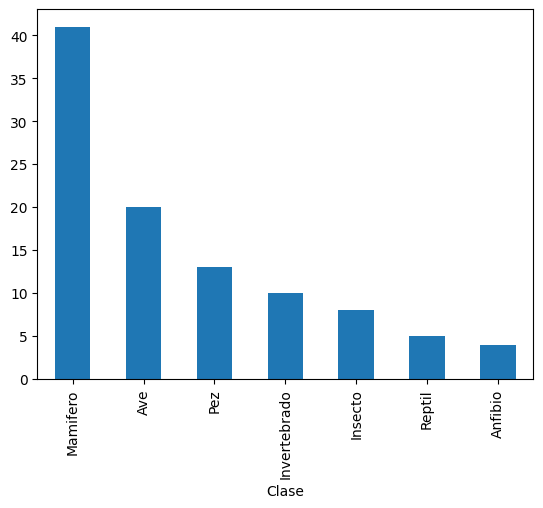

In [91]:
# a) Ploteamos las Clases
data['Clase'].value_counts().plot(kind='bar')
plt.show()

- El problema es que las Clases estan desbalanceadas

In [92]:
# b) Entrenamos el Perceptron para que clasifique a Mamiferos

# Normalizamos
data_temp = data.drop(['Clase', 'animal'], axis=1)
data_norm = pd.DataFrame(scaler.fit_transform(data_temp), columns=data_temp.columns)
# data_norm

# Creamos la Variable de Clase para cada Clase
Mamifero = (data['Clase'] == 'Mamifero').astype(int)

# Spliteamos
Xtrain, Xtest, ytrain, ytest = train_test_split(data_norm.values, Mamifero.values, test_size=0.2)

# Instanciamos el modelo y entrenamos
ppn = Perceptron(alpha=0.05, n_iter=200)
ppn.fit(Xtrain, ytrain)

# Probamos el modelo
ypred = ppn.predict(Xtest)

aciertos = sum(ypred == ytest)
print("aciertos = ", aciertos)

nAciertos = sum(ypred == ytest)
print("%% de aciertos = %.2f %%" % (100*nAciertos/Xtest.shape[0]))

# Usando Scickit-Learn
print('Accuracy de Scikit-Learn:', accuracy_score(ytest, ypred))

aciertos =  20
% de aciertos = 95.24 %
Accuracy de Scikit-Learn: 0.9523809523809523


## Ejercicio 5, automobile-simple

In [100]:
data = pd.read_csv(DATOS_DIR + 'automobile-simple.csv')
print(data.info())
display(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   make          205 non-null    object 
 1   fuel-type     205 non-null    object 
 2   num-of-doors  203 non-null    object 
 3   body-style    205 non-null    object 
 4   curb-weight   205 non-null    int64  
 5   engine-size   205 non-null    int64  
 6   horsepower    203 non-null    float64
 7   city-mpg      205 non-null    int64  
 8   highway-mpg   205 non-null    int64  
 9   price         201 non-null    float64
 10  volume        205 non-null    float64
 11  eco-rating    205 non-null    float64
dtypes: float64(4), int64(4), object(4)
memory usage: 19.3+ KB
None


,make,fuel-type,num-of-doors,body-style,curb-weight,engine-size,horsepower,city-mpg,highway-mpg,price,volume,eco-rating
0,alfa-romero,gas,two,convertible,2548,130,111.0,21,27,13495.0,528019.904,33.297462
1,alfa-romero,gas,two,convertible,2548,130,111.0,21,27,16500.0,528019.904,33.297462
2,alfa-romero,gas,two,hatchback,2823,152,154.0,19,26,16500.0,587592.640,30.898272
3,audi,gas,four,sedan,2337,109,102.0,24,30,13950.0,634816.956,42.697819
4,audi,gas,four,sedan,2824,136,115.0,18,22,17450.0,636734.832,27.997459


In [101]:
# Eliminamos los nulos
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 197 entries, 0 to 204
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   make          197 non-null    object 
 1   fuel-type     197 non-null    object 
 2   num-of-doors  197 non-null    object 
 3   body-style    197 non-null    object 
 4   curb-weight   197 non-null    int64  
 5   engine-size   197 non-null    int64  
 6   horsepower    197 non-null    float64
 7   city-mpg      197 non-null    int64  
 8   highway-mpg   197 non-null    int64  
 9   price         197 non-null    float64
 10  volume        197 non-null    float64
 11  eco-rating    197 non-null    float64
dtypes: float64(4), int64(4), object(4)
memory usage: 20.0+ KB


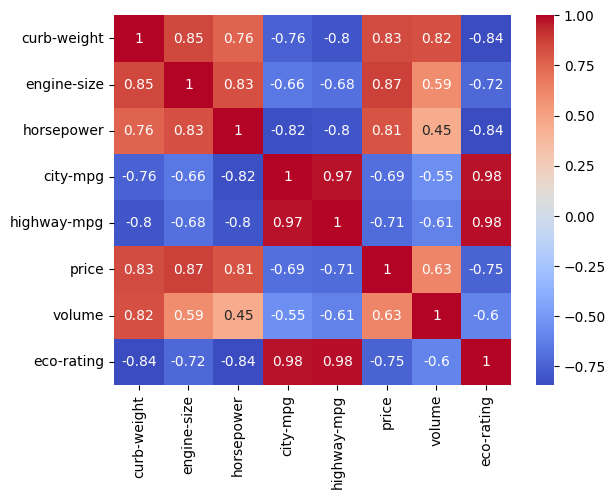

In [102]:
# Filtramos y nos quedamos solo con los numeros
data_numercis = data.select_dtypes(include=[np.number])

# Mostramos la Matrix de Correlacion
sns.heatmap(data_numercis.corr(), annot=True, cmap='coolwarm')
plt.show()

In [103]:
# Creamos el Umbral
thresshold = data['eco-rating'].mean()

# Creamos la variable de Clase, y la agregamos al dataset
data['Clase'] = (data['eco-rating'] > thresshold).astype(int)

# Pasamos a Numericas usando One-Hot
data_numercis = pd.get_dummies(data, columns=data.select_dtypes(include=['object']).columns).astype(int)
data_numercis

,curb-weight,engine-size,horsepower,city-mpg,highway-mpg,price,volume,eco-rating,Clase,make_alfa-romero,...,make_volvo,fuel-type_diesel,fuel-type_gas,num-of-doors_four,num-of-doors_two,body-style_convertible,body-style_hardtop,body-style_hatchback,body-style_sedan,body-style_wagon
0,2548,130,111,21,27,13495,528019,33,0,1,...,0,0,1,0,1,1,0,0,0,0
1,2548,130,111,21,27,16500,528019,33,0,1,...,0,0,1,0,1,1,0,0,0,0
2,2823,152,154,19,26,16500,587592,30,0,1,...,0,0,1,0,1,0,0,1,0,0
3,2337,109,102,24,30,13950,634816,42,1,0,...,0,0,1,1,0,0,0,0,1,0
4,2824,136,115,18,22,17450,636734,27,0,0,...,0,0,1,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,2952,141,114,23,28,16845,721961,38,0,0,...,1,0,1,1,0,0,0,0,1,0
201,3049,141,160,19,25,19045,720913,32,0,0,...,1,0,1,1,0,0,0,0,1,0
202,3012,173,134,18,23,21485,721961,29,0,0,...,1,0,1,1,0,0,0,0,1,0
203,3217,145,106,26,27,22470,721961,35,0,0,...,1,1,0,1,0,0,0,0,1,0


In [117]:
# Normalizamos con ZScore
data_zscore = pd.DataFrame(scaler.fit_transform(data_numercis.drop('Clase', axis=1)), columns=data_numercis.columns[:-1])

# Opcional: Eliminamos correlaciones. Se puede comentar esta linea
# data_zscore = data_zscore.drop(['city-mpg', 'horsepower'], axis=1)

# Opcional Pregunta #11: Solo las vairables “curb-weight”, “engine-size”, “highway-mpg”, “volumen”
data_zscore = data_zscore[['curb-weight', 'engine-size', 'highway-mpg', 'volume']]

# Modelamos
Xtrain, Xtest, ytrain, ytest = train_test_split(data_zscore.values, data_numercis['Clase'].values, test_size=0.2)

# Instanciamos el modelo y entrenamos
ppn = Perceptron(alpha=0.05, n_iter=100)
ppn.fit(Xtrain, ytrain)


# Probamos el modelo
ypred = ppn.predict(Xtest)

aciertos = sum(ypred == ytest)
print("aciertos = ", aciertos)

nAciertos = sum(ypred == ytest)
print("%% de aciertos = %.2f %%" % (100*nAciertos/Xtest.shape[0]))

aciertos =  39
% de aciertos = 97.50 %


In [108]:
# Normalizamos con MinMax
data_minmax = pd.DataFrame(MinMaxScaler().fit_transform(data_numercis.drop('Clase', axis=1)), columns=data_numercis.columns[:-1])

# Opcional: Eliminamos correlaciones. Se puede comentar esta linea
data_minmax = data_minmax.drop(['city-mpg', 'horsepower'], axis=1)

# Modelamos
Xtrain, Xtest, ytrain, ytest = train_test_split(data_minmax.values, data_numercis['Clase'].values, test_size=0.2)

# Instanciamos el modelo y entrenamos
ppn = Perceptron(alpha=0.05, n_iter=200)
ppn.fit(Xtrain, ytrain)

# Probamos el modelo
ypred = ppn.predict(Xtest)

aciertos = sum(ypred == ytest)
print("aciertos = ", aciertos)

nAciertos = sum(ypred == ytest)
print("%% de aciertos = %.2f %%" % (100*nAciertos/Xtest.shape[0]))


aciertos =  39
% de aciertos = 97.50 %


In [109]:
# sin normalizar
data_sin_normalizar = data_numercis.drop('Clase', axis=1)

# Opcional: Eliminamos correlaciones. Se puede comentar esta linea
data_sin_normalizar = data_sin_normalizar.drop(['city-mpg', 'horsepower'], axis=1)

# Modelamos
Xtrain, Xtest, ytrain, ytest = train_test_split(data_sin_normalizar.values, data_numercis['Clase'].values, test_size=0.2)

# Instanciamos el modelo y entrenamos
ppn = Perceptron(alpha=0.05, n_iter=200)
ppn.fit(Xtrain, ytrain)

# Probamos el modelo
ypred = ppn.predict(Xtest)

aciertos = sum(ypred == ytest)
print("aciertos = ", aciertos)

nAciertos = sum(ypred == ytest)
print("%% de aciertos = %.2f %%" % (100*nAciertos/Xtest.shape[0]))



aciertos =  32
% de aciertos = 80.00 %
